<a href="https://colab.research.google.com/github/dinesh052003/Perceptron-Implementation-using-ANN/blob/main/Implementation_perceptron_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons
plt.style.use("seaborn")

<ipython-input-1-c02ae9a65179>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:

x,y= make_blobs(n_samples=500,centers=2,n_features=2,random_state=10)
print(x.shape,y.shape)

(500, 2) (500,)


In [3]:
y

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [4]:
x

array([[  5.83801528,  -9.29715058],
       [  5.67102739,  -9.76225984],
       [  3.15598083,   5.95298368],
       [  3.87586762,   5.94663718],
       [  3.94478532,   4.85652467],
       [  2.82983681,   4.85628288],
       [  4.99059695,  -9.04869246],
       [  5.31414039,  -9.94714146],
       [  2.37830662,   4.78915634],
       [  2.54234378,   5.46906286],
       [  3.64313269,   5.42712386],
       [  3.88101257,  -9.59334486],
       [  6.04666737, -10.65352872],
       [  1.65611544,   5.46167742],
       [  3.74596695,  -8.90825282],
       [  7.03787016,  -9.34562175],
       [  5.88730132,  -8.922587  ],
       [  3.24365815,   4.46320246],
       [  2.54406041,   6.89173024],
       [  2.44257249,   6.84606548],
       [  4.94431973,  -9.4953734 ],
       [  4.4198443 ,  -9.84249464],
       [  4.71934142,  -9.03829618],
       [  6.1858842 ,  -9.61888801],
       [  5.18940868,  -9.52767586],
       [  6.40648699, -11.98053303],
       [  6.97157463, -10.27664867],
 

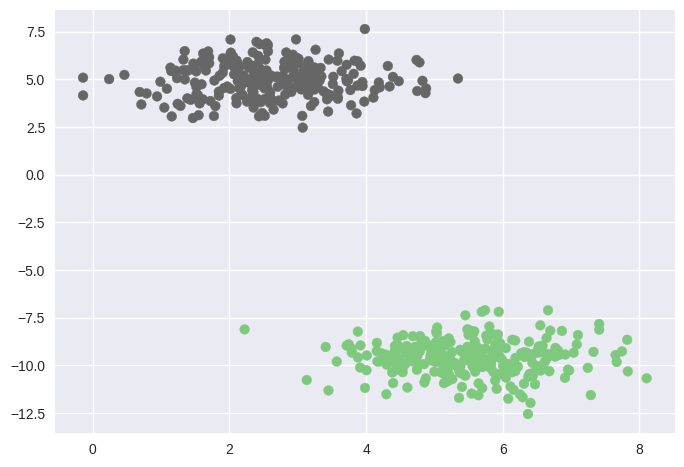

In [5]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

MODEL AND HELPER FUNCTION

In [6]:
 def sigmoid(z):
     return (1.0)/(1+np.exp(-z))

In [7]:
z=np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [10]:
def predict(x,weights):
    z=np.dot(x,weights)
    predictions=sigmoid(z)
    return predictions

def loss(x,y,weights):
    y_=predict(x,weights)
    cost=np.mean(-y*np.log(y_)-(1-y)*np.log(1-y_))
    return cost

def update(x,y,weights,learning_rate):
    y_=predict(x,weights)
    dw=np.dot(x.T,y_-y)
    m=x.shape[0]
    weights=weights-learning_rate*dw/(float(m))
    return weights

def train(x,y,learning_rate, maxEpochs): # Add maxEpochs as a parameter
    ones=np.ones((x.shape[0],1))
    x=np.hstack((ones,x))
    weights=np.zeros(x.shape[1])
    for epoch in range(maxEpochs): # Use maxEpochs in the loop
        weights=update(x,y,weights,learning_rate)
        if epoch%10==0:
            l=loss(x,y,weights)
            print("Epoch number %d loss%.4f"%(epoch,1))
    return weights


In [11]:
weights=train(x,y,learning_rate=0.01,maxEpochs=100)

Epoch number 0 loss1.0000
Epoch number 10 loss1.0000
Epoch number 20 loss1.0000
Epoch number 30 loss1.0000
Epoch number 40 loss1.0000
Epoch number 50 loss1.0000
Epoch number 60 loss1.0000
Epoch number 70 loss1.0000
Epoch number 80 loss1.0000
Epoch number 90 loss1.0000


VISUALIZATIONS AND PREDICTIONS

In [12]:
def get_preds(x_test,weights):
    if x_test.shape[1]!=weights.shape[0]:
        ones=np.one(x_test.shape[0],1)
        x_test=np.hstack(ones,x_test)
    probs=predict(x_test,weights)
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels

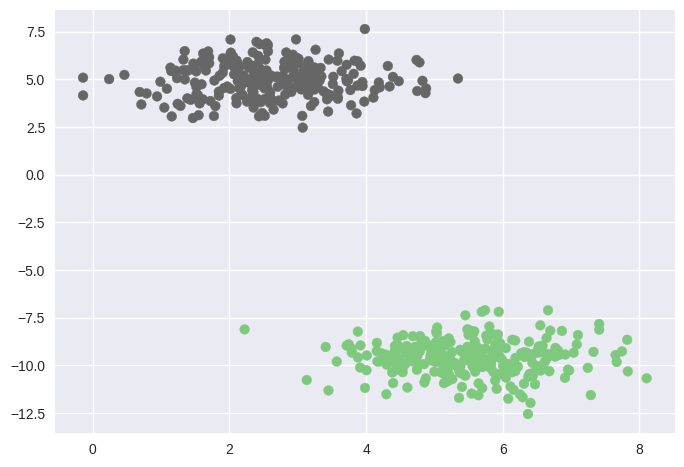

In [13]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [14]:
x1=np.linspace(-2,10,10)
print(x1)

x2=-(weights[0]+weights[1]*x1)/weights[2]
print(x2)

[-2.         -0.66666667  0.66666667  2.          3.33333333  4.66666667
  6.          7.33333333  8.66666667 10.        ]
[ 0.09171773 -0.02505281 -0.14182334 -0.25859387 -0.37536441 -0.49213494
 -0.60890547 -0.72567601 -0.84244654 -0.95921707]


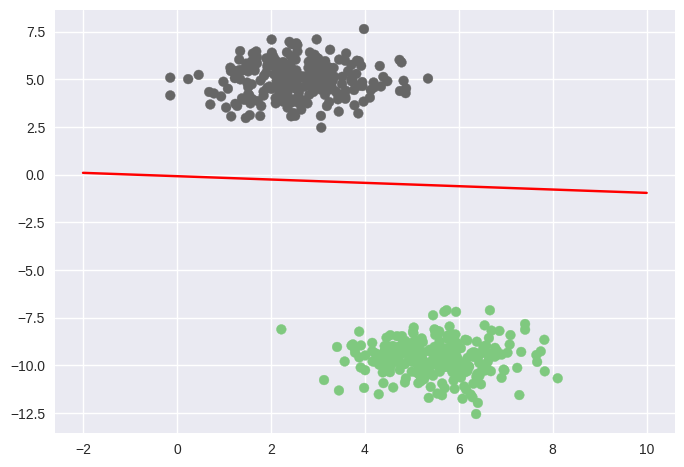

In [15]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()